<a href="https://colab.research.google.com/github/antonio2505/Data_Science_Business_CS/blob/main/Polynomial_Regression_Predict_Cost_per_Unit_sold_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CODE TO PERFORM POLYNOMIAL REGRESSION




# PROBLEM STATEMENT

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

# STEP#1: IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP#2: IMPORT DATASET

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Employee_Salary.csv to Employee_Salary.csv


In [3]:
salary = pd.read_csv('Employee_Salary.csv')

In [4]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
salary.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [6]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


# STEP#3: VISUALIZE DATASET

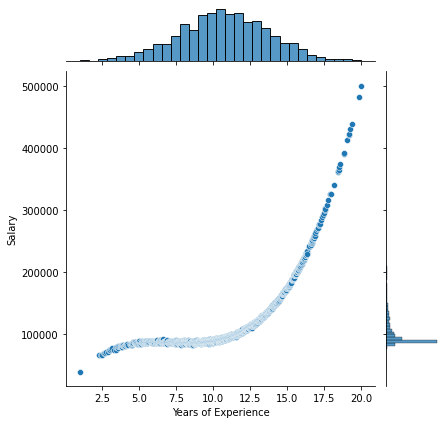

In [9]:
sns.jointplot(x= 'Years of Experience', y = 'Salary', data = salary)

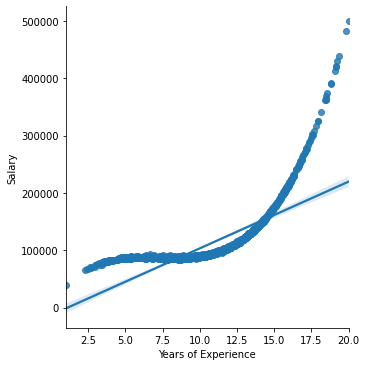

In [10]:
sns.lmplot(x= 'Years of Experience', y = 'Salary', data = salary)

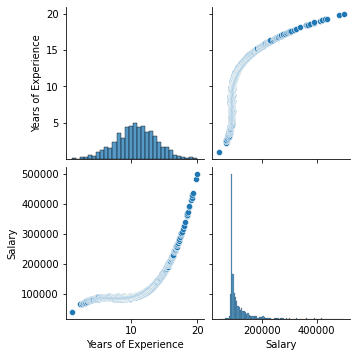

In [11]:
sns.pairplot(salary)

# STEP#4: CREATE TRAINING DATASET

In [14]:
x = salary[['Years of Experience']]

In [15]:
x

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [19]:
y = salary['Salary']

In [20]:
y

0        40000.00000
1        65979.42119
2        67253.57549
3        67342.43510
4        70532.20448
            ...     
1995    421534.69100
1996    430478.02650
1997    438090.84540
1998    482242.16080
1999    500000.00000
Name: Salary, Length: 2000, dtype: float64

In [21]:
x_train = x
y_train = y

# (SOLUTION #1: LINEAR ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [22]:
x_train.shape

(2000, 1)

In [23]:
y_train.shape

(2000,)

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False)
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [36]:
print('Linear Model coef (m): ', regressor.coef_)
print('Linear Model coef (b): ', regressor.intercept_)

Linear Model coef (m):  [10511.28514602]
Linear Model coef (b):  0.0


In [ ]:
#fit_intercept =True
#Linear Model coef (m):  [11640.22916165]
#Linear Model coef (b):  -13063.099315186948

#fit_intercept =False
#Linear Model coef (m):  [10511.28514602]
#Linear Model coef (b):  0.0

# STEP#6: VISUALIZE THE RESULTS

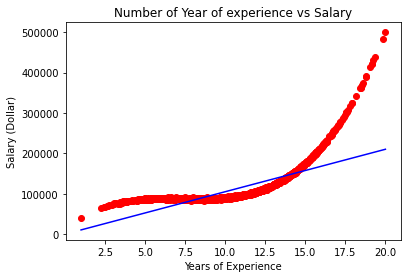

In [37]:
plt.scatter(x_train, y_train, color = 'r')
plt.plot(x_train, regressor.predict(x_train), color = 'b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (Dollar)')
plt.title("Number of Year of experience vs Salary")
plt.show()

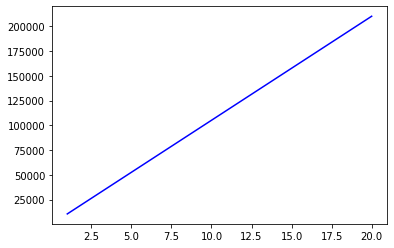

# (SOLUTION #2: POLYNOMIAL ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [55]:
from sklearn.preprocessing  import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree = 5)

In [56]:
x_columns = poly_regressor.fit_transform(x_train)
x_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [57]:
regressor = LinearRegression()
regressor.fit(x_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print('Linear Model coef (m): ', regressor.coef_)
print('Linear Model coef (b): ', regressor.intercept_)

Linear Model coef (m):  [ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
 -1.03521070e+00  2.09284278e-02]
Linear Model coef (b):  11462.338087119235


# STEP#6: VISUALIZE THE RESULTS

In [59]:
y_pred = regressor.predict(poly_regressor.fit_transform(x_train))

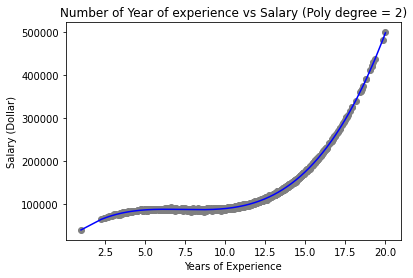

In [60]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, y_pred, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (Dollar)')
plt.title("Number of Year of experience vs Salary (Poly degree = 2)")
plt.show()

# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH POLYNOMIAL REGRESSION!